In [1]:
from lib.notebook_imports import *

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

%load_ext autoreload
%autoreload 2

shap.initjs()

start_time = datetime.now()


# READ DATA

In [2]:
data_900 = read_data('/dysk1/approx/invicta/1.1.1./', merge_with_meds=True, merge_with_patient_genes=True)
data_900_df = data_900.input_df
data_2015_df = read_data_2015('/dysk1/approx/invicta/1.1.1./')

LGB_PARAMS_BASE, N_FOLDS, ALL_MODEL_SUFFIXES, BASE_COLS_1, BASE_COLS_2 = get_consts()

DATA_SERIES_900, DATA_SERIES_2015, DATA_SERIES = prepare_data_series(data_900_df, data_2015_df, N_FOLDS)


Converting ds_789_result_num_E2 to float
Converting amh_qual_result_num to float
Converting qual_result_num_FSH to float
Converting qual_result_num_DHEAS to float
Converting qual_result_num_Inh_B to float
Converting qual_result_num_TST to float
Converting qual_result_num_anty_TPO to float
Converting qual_result_num_TSH to float
Converting qual_result_num_SHBG to float
pickups_df:                  981
merged with meds_df:         936
merged with patient_gens_df: 922
merged with poli_changes_df: 922
merged with causes_df: 922
merged with patient_groups_df: 922
-
dhea_s:          low: 2%,  normal: 87%, high: 11%, filled: 63%, ()
shbg:            low: 1%,  normal: 80%, high: 19%, filled: 39%, ()
testosterone:    low: 49%, normal: 46%, high: 5%, filled: 40%, ()
fsh:             low: 9%,  normal: 64%, high: 26%, filled: 45%, (?)
tsh:             low: 65%, normal: 32%, high: 3%, filled: 72%, ()
lh:              low: 5%,  normal: 74%, high: 22%, filled: 28%, (faza folikularna)
e2:             

Columns (22,34,43,47,51,57,62,82,238,240) have mixed types.Specify dtype option on import or set low_memory=False.


Data len: 13084
Data len: 13084 after merge with causes
Converting amh_qual_result_num to float
Converting qual_result_num_FSH to float
Converting qual_result_num_DHEAS to float
Converting qual_result_num_Inh_B to float
Converting qual_result_num_TST to float
Converting qual_result_num_anty_TPO to float
Converting qual_result_num_TSH to float
Converting qual_result_num_SHBG to float
Converting ds1_3_dawka to float
Converting ds1_7_dawka to float
-
FSH:             low: 8%,  normal: 76%, high: 16%, filled: 42%, (?)
DHEAS:           low: 3%,  normal: 86%, high: 10%, filled: 60%, ()
Inh_B:           low: 30%, normal: 40%, high: 29%, filled: 45%, (faza folikularna)
TST:             low: 54%, normal: 44%, high: 2%, filled: 45%, ()
TSH:             low: 62%, normal: 35%, high: 3%, filled: 55%, ()
SHBG:            low: 1%,  normal: 75%, high: 24%, filled: 42%, ()
-
valid_FSH:       low: 9%,  normal: 74%, high: 17%, filled: 28%, (?)
valid_DHEAS:     low: 3%,  normal: 86%, high: 10%, filled: 46

In [14]:
df = DATA_SERIES_900['900_day_0_mii'].input_df


Boolean Series key will be reindexed to match DataFrame index.


<AxesSubplot:xlabel='test_amh_r', ylabel='ds1_3_dawka_dzienna'>

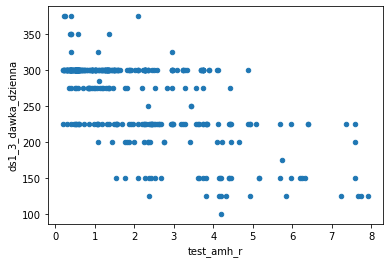

In [20]:
df[(df['ds1_3_dawka_dzienna'] < 400) & (data_900.input_df['test_amh_r'] < 8)& (data_900.input_df['test_amh_r'] > 0.2)]\
    .sort_values('test_amh_r').plot.scatter('test_amh_r', 'ds1_3_dawka_dzienna')

# BASE EXPERIMENTS

In [3]:
BASE_RESULTS = perform_base_experiments(
    LGB_PARAMS_BASE,
    DATA_SERIES,
    ALL_MODEL_SUFFIXES,
    ['l2'],
    [BASE_COLS_1, BASE_COLS_2]
)

divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by 

-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.67    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.40    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.86    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.55    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.65    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.75    
-----------------------------
-
RMSE[fold_avg][l2][2015_cumulus_denuded]:      count:8801   avg:9.08   4.78    
MAE[fold_avg][l2][2015_cumulus_denuded]:       count:8801   avg:9.08   3.59    
MAPE[fold_avg][l2][2015_cumulus_denuded]:      count:8801   avg:9.08   0.66    
-----------------------------
-
RMSE[fold_avg][l2][2015_day_0_mii]:            count:8700   avg:6.95   3.94    
MAE[fold_avg][l2][2015_day_0_mii]:             count:8700   avg:6.95   2.97    
MAPE[fold_avg][l2][201

divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.41    (-0.26)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.16    (-0.24)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.11)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.53    (-0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.58    (-0.06)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.71    (-0.04)    
-----------------------------
-
RMSE[fold_avg][l2][2015_cumulus_denuded]:      count:8801   avg:9.08   4.53    (-0.25)    
MAE[fold_avg][l2][2015_cumulus_denuded]:       count:8801   avg:9.08   3.37    (-0.22)    
MAPE[fold_avg][l2][2015_cumulus_denuded]:      count:8801   avg:9.08   0.60    (-0.06)    
-----------------------------
-
RMSE[fold_avg][l2][2015_day_0_mii]:            count:8700   avg:6.95   3.78    (-0.

divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


# PREPARE COLUMN SETS

In [4]:
COL_SETS = prepare_column_sets(data_900, data_2015_df)

In [5]:
for key, cols in asdict(COL_SETS).items():
    print(f'{key.ljust(40, " ")}: {len(cols)}')

DS1_PECH_COLS                           : 6
MODULATED_COLS                          : 3
VARIOUS_COLS_900                        : 6
HORMONE_COLS_900                        : 8
HORMONE_NORMS_COLS_900                  : 8
HORMONE_NORMS_VALID_IN_TIME_COLS_900    : 8
VALID_SUM_DOSES_COLS_900                : 19
VALID_SUM_DOSES_AND_DAYS_DIFF_COLS_900  : 20
CAUSE_COLS_900                          : 11
VARIOUS_COLS_2015                       : 6
HORMONE_COLS_2015                       : 7
HORMONE_NORMS_COLS_2015                 : 7
HORMONE_NORMS_VALID_IN_TIME_COLS_2015   : 6
FSH_NORM_CYCLED_COLS_2015               : 1
CAUSE_COLS_2015                         : 11


In [6]:
for key, cols in asdict(COL_SETS).items():
    print("============================")
    print(key)
    print_cols(cols)

DS1_PECH_COLS
Number of columns: 6
-
    "ds1_pech_licz_14_pow",
    "ds1_pech_licz_18_pow",
    "ds1_pech_licz_11_pow",
    "ds1_pech_licz_3_8",
    "ds1_pech_licz_2_8",
    "ds1_pech_licz_16_22",
-
MODULATED_COLS
Number of columns: 3
-
    "ds1_3_dawka_dzienna",
    "ds4_7_dawka_dzienna",
    "prot_type",
-
VARIOUS_COLS_900
Number of columns: 6
-
    "pickup_no_4m_prev",
    "poseidon_group",
    "prev_proc-denuded_per_bubbles",
    "prev_proc-mii_per_bubbles",
    "prev_proc-ds1_3_dawka_dzienna",
    "prev_proc-ds4_7_dawka_dzienna",
-
HORMONE_COLS_900
Number of columns: 8
-
    "test_inhibina_b_r",
    "test_tsh_r",
    "test_e2_r",
    "test_fsh_r",
    "test_lh_r",
    "test_testosterone_r",
    "test_shbg_r",
    "test_dhea_s_r",
-
HORMONE_NORMS_COLS_900
Number of columns: 8
-
    "norm_dhea_s",
    "norm_shbg",
    "norm_testosterone",
    "norm_fsh",
    "norm_tsh",
    "norm_lh",
    "norm_e2",
    "norm_inhibina_b",
-
HORMONE_NORMS_VALID_IN_TIME_COLS_900
Number of columns: 8


In [7]:
GENE_COL_SETS = prepare_gene_column_sets(
    data_900,
    LGB_PARAMS_BASE,
    BASE_COLS_2,
    DATA_SERIES_900,
    ['l1', 'l2', 'log_l2', 'mape']
)


Calculating SHAP_IMPORTANT_COLS_900


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.
Setting feature_perturbation = "tree_path_dependent" because no background data was given.


Calculating BORUTA_GENES_LONGLIST_WITH_AMH_900
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100


Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argu

Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argu

Calculating BORUTA_GENES_LONGLIST_WITHOUT_AMH_900


Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argu

Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argu

Calculating BORUTA_GENES_SHORTLIST_WITH_AMH_900


Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argu

Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argu

Calculating BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900


Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argu

Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argument
Found `num_boost_round` in params. Will use it instead of argu

In [8]:
for key, cols in asdict(GENE_COL_SETS).items():
    print(f'{key.ljust(40, " ")}: {len(cols)}')


ALL_GENES_COLS_900                      : 673
LITERATURE_GENES_COLS_900               : 18
SHAP_IMPORTANT_GENES_COLS_900           : 23
BORUTA_GENES_LONGLIST_WITH_AMH_900      : 59
BORUTA_GENES_LONGLIST_WITHOUT_AMH_900   : 83
BORUTA_GENES_SHORTLIST_WITH_AMH_900     : 7
BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900  : 21
SHORTLIST_CONST_900                     : 7


In [9]:
for key, cols in asdict(GENE_COL_SETS).items():
    print("============================")
    print(key)
    print_cols(cols)

ALL_GENES_COLS_900
Number of columns: 673
-
    "AMHR2_12_53424132_A_T",
    "AMHR2_12_53424433_A_G",
    "AMHR2_12_53425136_T_C",
    "AMHR2_12_53425326_G_A",
    "AMHR2_12_53425683_T_C",
    "AMHR2_12_53428886_A_G",
    "AMHR2_12_53429208_C_T",
    "AMHR2_12_53429253_A_G",
    "AMHR2_12_53429539_T_C",
    "AMHR2_12_53429764_G_A",
    "AMHR2_12_53430187_-_CTGGGCAATACCCCTACCTCTGATGAG",
    "AMHR2_12_53430359_G_A",
    "AMHR2_12_53430960_G_A",
    "AMHR2_12_53431536_C_T",
    "AMHR2_12_53431541_C_T",
    "AMH_19_2249385_T_C",
    "AMH_19_2249408_G_A",
    "AMH_19_2249584_A_G",
    "AMH_19_2249635_A_G",
    "AMH_19_2249737_C_G",
    "AMH_19_2250176_T_C",
    "AMH_19_2250237_A_G",
    "AMH_19_2250313_T_C",
    "AMH_19_2250352_T_C",
    "AMH_19_2250470_A_G",
    "AMH_19_2250477_G_C",
    "AMH_19_2250523_A_G",
    "AMH_19_2250529_A_G",
    "AMH_19_2251138_G_C",
    "AMH_19_2251179_A_G",
    "AMH_19_2251180_A_G",
    "AMH_19_2251248_G_A",
    "AMH_19_2251328_T_C",
    "AMH_19_2251513_A_T",
 

# PREPARE GENE PROFILE FEATURES

In [10]:
%%time

DATA_SERIES_900, LDA_TOPIC_COLS, JACCARD_COLS = add_gene_profiles_from_train_for_data_series(
    DATA_SERIES_900, asdict(GENE_COL_SETS))


DATA_SERIES[900_cumulus_denuded]
SPLIT: 0
Creating column: ALL_GENES_COLS_900_CSV
Creating column: ALL_GENES_COLS_900_CSV
Creating column: LITERATURE_GENES_COLS_900_CSV
Creating column: LITERATURE_GENES_COLS_900_CSV
Creating column: SHAP_IMPORTANT_GENES_COLS_900_CSV
Creating column: SHAP_IMPORTANT_GENES_COLS_900_CSV
Creating column: BORUTA_GENES_LONGLIST_WITH_AMH_900_CSV
Creating column: BORUTA_GENES_LONGLIST_WITH_AMH_900_CSV
Creating column: BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_CSV
Creating column: BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_CSV
Creating column: BORUTA_GENES_SHORTLIST_WITH_AMH_900_CSV
Creating column: BORUTA_GENES_SHORTLIST_WITH_AMH_900_CSV
Creating column: BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_CSV
Creating column: BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_CSV
Creating column: SHORTLIST_CONST_900_CSV
Creating column: SHORTLIST_CONST_900_CSV
-
Creating column: ALL_GENES_COLS_900_LDA_TOPIC
Creating column: LITERATURE_GENES_COLS_900_LDA_TOPIC
Creating column: SHAP_IMPORTANT_GEN

Creating column: BORUTA_GENES_SHORTLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
-
SPLIT: 3
Creating column: ALL_GENES_COLS_900_CSV
Creating column: ALL_GENES_COLS_900_CSV
Creating column: LITERATURE_GENES_COLS_900_CSV
Creating column: LITERATURE_GENES_COLS_900_CSV
Creating column: SHAP_IMPORTANT_GENES_COLS_900_CSV
Creating column: SHAP_IMPORTANT_GENES_COLS_900_CSV
Creating column: BORUTA_GENES_LONGLIST_WITH_AMH_900_CSV
Creating column: BORUTA_GENES_LONGLIST_WITH_AMH_900_CSV
Creating column: BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_CSV
Creating column: BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_CSV
Creating column: BORUTA_GENES_SHORTLIST_WITH_AMH_900_CSV
Creating column: BORUTA_GENES_SHORTLIST_WITH_AMH_900_CSV
Creating column: BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_CSV
Creating column: BORUTA_GENES_SHORTLIST_WITHOUT_A

Creating column: SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: BORUTA_GENES_SHORTLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
-
SPLIT: 1
Creating column: ALL_GENES_COLS_900_CSV
Creating column: ALL_GENES_COLS_900_CSV
Creating column: LITERATURE_GENES_COLS_900_CSV
Creating column: LITERATURE_GENES_COLS_900_CSV
Creating column: SHAP_IMPORTANT_GENES_COLS_900_CSV
Creating column: SHAP_IMPORTANT_GENES_COLS_900_CSV
Creating column: BORUTA_GENES_LONGLIST_WITH_AMH_900_CSV
Creating column: BORUTA_GENES_LONGLIST_WITH_AMH_900_CSV
Creating column: BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_CSV
Creating colum

-
Creating column: ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: BORUTA_GENES_SHORTLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
Creating column: SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg
-
SPLIT: 4
Creating column: ALL_GENES_COLS_900_CSV
Creating column: ALL_GENES_COLS_900_CSV
Creating column: LITERATURE_GENES_COLS_900_CSV
Creating column: LITERATURE_GENES_COLS_900_CSV
Creating column: SHAP_IMPORTANT_GENES_COLS_900_CSV
Creating column: SHAP_IMPORTANT_GENES_COLS_900_CSV
Creating column: BORUTA_GENE

In [11]:
print_cols(LDA_TOPIC_COLS)

Number of columns: 8
-
    "ALL_GENES_COLS_900_LDA_TOPIC",
    "LITERATURE_GENES_COLS_900_LDA_TOPIC",
    "BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_LDA_TOPIC",
    "BORUTA_GENES_LONGLIST_WITH_AMH_900_LDA_TOPIC",
    "SHORTLIST_CONST_900_LDA_TOPIC",
    "SHAP_IMPORTANT_GENES_COLS_900_LDA_TOPIC",
    "BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_LDA_TOPIC",
    "BORUTA_GENES_SHORTLIST_WITH_AMH_900_LDA_TOPIC",
-


In [12]:
print_cols(JACCARD_COLS)

Number of columns: 16
-
    "BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_SHORTLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10

# TRAIN COMBINATIONS

In [13]:
MODEL_SUFFIX = 'mape'
SORT_METRIC = 'MAPE'

MODEL_SUFFIX = 'l2'
SORT_METRIC = 'RMSE'

ETA_900 = 1.12
ETA_2015 = 1/1.80

SELECTED_BASE_RESULT = BASE_RESULTS[1]

# TRAIN FULL GENE COLUMN SETS

In [14]:
for key, cols in asdict(GENE_COL_SETS).items():
    print("============================")
    print(key)
    
    TRAIN_RESULTS = train_data_series(
        LGB_PARAMS_BASE, DATA_SERIES_900,
        BASE_COLS_2 + cols,
        model_suffixes_filter=ALL_MODEL_SUFFIXES)

    TRAIN_RESULTS.print_errors(
        BASE_RESULTS,
        print_suffixes=['l2'],
        print_avg=True,
    )

ALL_GENES_COLS_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.59    (-0.09)    (0.17)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.27    (-0.13)    (0.11)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.80    (-0.06)    (0.05)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.63    (0.08)    (0.10)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.68    (0.03)    (0.09)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.75    (0.00)    (0.04)    
-----------------------------
LITERATURE_GENES_COLS_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.46    (-0.21)    (0.05)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.19    (-0.21)    (0.03)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.76    (-0.10)    (0.01)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.55    (-0.00)    (0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.61    (-0.04)    (0.03)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.72    (-0.03)    (0.01)    
-----------------------------
SHAP_IMPORTANT_GENES_COLS_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.49    (-0.18)    (0.08)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.24    (-0.16)    (0.08)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.78    (-0.08)    (0.03)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.51    (-0.04)    (-0.02)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.57    (-0.08)    (-0.01)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.69    (-0.06)    (-0.02)    
-----------------------------
BORUTA_GENES_LONGLIST_WITH_AMH_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.55    (-0.12)    (0.14)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.23    (-0.16)    (0.08)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.78    (-0.08)    (0.03)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.61    (0.06)    (0.08)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.65    (-0.00)    (0.06)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.73    (-0.02)    (0.02)    
-----------------------------
BORUTA_GENES_LONGLIST_WITHOUT_AMH_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.55    (-0.12)    (0.14)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.24    (-0.16)    (0.08)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.78    (-0.08)    (0.03)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.62    (0.07)    (0.09)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.67    (0.02)    (0.08)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.74    (-0.01)    (0.03)    
-----------------------------
BORUTA_GENES_SHORTLIST_WITH_AMH_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.43    (-0.25)    (0.01)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.17    (-0.23)    (0.01)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.11)    (-0.01)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.45    (-0.10)    (-0.08)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.52    (-0.13)    (-0.07)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.68    (-0.08)    (-0.04)    
-----------------------------
BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.50    (-0.17)    (0.08)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.23    (-0.17)    (0.07)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.77    (-0.09)    (0.02)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.52    (-0.03)    (-0.01)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.58    (-0.07)    (-0.01)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.70    (-0.05)    (-0.01)    
-----------------------------
SHORTLIST_CONST_900


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


-
RMSE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   4.43    (-0.25)    (0.01)    
MAE[fold_avg][l2][900_cumulus_denuded]:        count:530    avg:7.64   3.17    (-0.23)    (0.01)    
MAPE[fold_avg][l2][900_cumulus_denuded]:       count:530    avg:7.64   0.75    (-0.11)    (-0.01)    
-----------------------------
-
RMSE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   3.45    (-0.10)    (-0.08)    
MAE[fold_avg][l2][900_day_0_mii]:              count:516    avg:5.92   2.52    (-0.13)    (-0.07)    
MAPE[fold_avg][l2][900_day_0_mii]:             count:516    avg:5.92   0.68    (-0.08)    (-0.04)    
-----------------------------


divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars
divide by zero encountered in double_scalars


# LDA_TOPIC_COLS

0it [00:00, ?it/s]

Number of columns: 8
-
    "ALL_GENES_COLS_900_LDA_TOPIC",
    "LITERATURE_GENES_COLS_900_LDA_TOPIC",
    "BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_LDA_TOPIC",
    "BORUTA_GENES_LONGLIST_WITH_AMH_900_LDA_TOPIC",
    "SHORTLIST_CONST_900_LDA_TOPIC",
    "SHAP_IMPORTANT_GENES_COLS_900_LDA_TOPIC",
    "BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_LDA_TOPIC",
    "BORUTA_GENES_SHORTLIST_WITH_AMH_900_LDA_TOPIC",
-
# Number of column combinations: 8
# ETA: 0:00:07


Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
Overriding the parameters from Reference Dataset.
categorical_column in param dict is overridden.
1it [00:00,  1.21it/

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,0.000770
1,RMSE_900_day_0_mii,-0.084896
2,RMSE_0b_first_time_900_cumulus_denuded,-0.027334
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.181945
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.235274
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.041728
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.217125
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.222871
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.031595
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.063226


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""BORUTA_GENES_LONGLIST_WITH_AMH_900_LDA_TOPIC""]",0.000770,-0.034182,0.062404,-0.181945,-0.096137,0.001132,-0.069091,-0.014916,0.062872,-0.040258,-0.055394,-0.103157,0.099537,0.058116,-0.064246,-0.182920,0.083051,0.030017
"[""SHAP_IMPORTANT_GENES_COLS_900_LDA_TOPIC""]",0.002259,-0.043490,-0.027334,-0.036458,0.000907,0.160199,-0.217125,0.098491,0.040959,0.024568,-0.060163,-0.158514,0.014463,-0.053690,0.081285,-0.003812,-0.002050,0.004727
"[""SHORTLIST_CONST_900_LDA_TOPIC""]",0.011830,-0.084896,0.041173,0.070308,-0.101784,0.014229,0.026230,-0.092370,-0.031595,-0.029447,-0.091168,-0.276705,-0.119197,-0.002585,-0.168099,-0.082226,-0.015406,0.023645
"[""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_LDA_TOPIC""]",0.026059,-0.049876,0.087771,-0.064299,-0.033327,0.053243,-0.198961,0.133092,-0.025670,-0.032833,-0.054356,-0.209275,0.016864,0.037571,0.111563,-0.175726,0.020942,0.011920
"[""BORUTA_GENES_SHORTLIST_WITH_AMH_900_LDA_TOPIC""]",0.027851,-0.027150,0.059257,0.118198,-0.235274,-0.041728,0.142232,-0.222871,-0.010868,0.057822,-0.063786,0.046314,-0.032511,0.008343,-0.073377,-0.088755,0.007620,-0.002156


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""SHORTLIST_CONST_900_LDA_TOPIC""]",0.011830,-0.084896,0.041173,0.070308,-0.101784,0.014229,0.026230,-0.092370,-0.031595,-0.029447,-0.091168,-0.276705,-0.119197,-0.002585,-0.168099,-0.082226,-0.015406,0.023645
"[""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_LDA_TOPIC""]",0.026059,-0.049876,0.087771,-0.064299,-0.033327,0.053243,-0.198961,0.133092,-0.025670,-0.032833,-0.054356,-0.209275,0.016864,0.037571,0.111563,-0.175726,0.020942,0.011920
"[""SHAP_IMPORTANT_GENES_COLS_900_LDA_TOPIC""]",0.002259,-0.043490,-0.027334,-0.036458,0.000907,0.160199,-0.217125,0.098491,0.040959,0.024568,-0.060163,-0.158514,0.014463,-0.053690,0.081285,-0.003812,-0.002050,0.004727
"[""LITERATURE_GENES_COLS_900_LDA_TOPIC""]",0.057069,-0.039157,0.183097,-0.123249,-0.031199,0.032552,-0.085484,0.084815,0.004310,-0.063226,0.005036,-0.219114,-0.003539,-0.005282,-0.098165,-0.165698,0.001015,0.047064
"[""BORUTA_GENES_LONGLIST_WITH_AMH_900_LDA_TOPIC""]",0.000770,-0.034182,0.062404,-0.181945,-0.096137,0.001132,-0.069091,-0.014916,0.062872,-0.040258,-0.055394,-0.103157,0.099537,0.058116,-0.064246,-0.182920,0.083051,0.030017


RMSE_900_cumulus_denuded


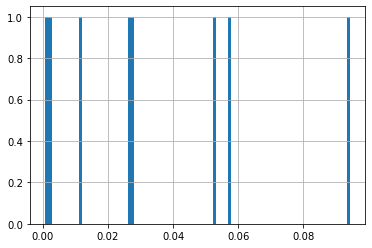

RMSE_900_day_0_mii


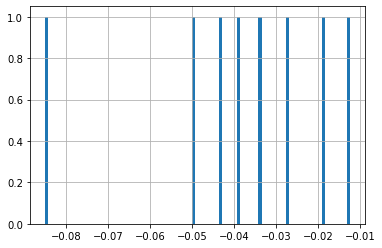

CPU times: user 28.3 s, sys: 300 ms, total: 28.6 s
Wall time: 7.35 s


In [15]:
%%time

print_cols(LDA_TOPIC_COLS)

all_genes_900_df = train_generated_cols(
    gen_combinations(LDA_TOPIC_COLS, 1, 1),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

# JACCARD_COLS

0it [00:00, ?it/s]

Number of columns: 16
-
    "BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_SHORTLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10

16it [00:11,  1.34it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.109338
1,RMSE_900_day_0_mii,-0.073964
2,RMSE_0b_first_time_900_cumulus_denuded,-0.244784
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.311549
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.426464
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.064058
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.193785
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.065271
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.064299
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.114359


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.109338,-0.037550,-0.244784,-0.311549,-0.172722,0.122653,0.110992,0.158885,-0.007138,-0.007336,-0.084091,0.014334,-0.050626,-0.214291,0.024123,0.072846,0.043958,-0.018660
"[""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg""]",-0.048075,-0.007086,-0.105619,-0.231654,-0.101741,0.106840,0.010419,0.198213,-0.018843,-0.002348,-0.074018,0.103622,-0.088717,-0.058375,0.056021,-0.004651,0.031645,0.058920
"[""BORUTA_GENES_SHORTLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg""]",-0.008497,0.014455,0.034778,0.046429,-0.426464,0.074038,-0.180384,-0.065271,-0.064299,-0.069593,-0.034687,0.066904,0.062484,0.287657,-0.168515,0.003189,0.001339,0.005564
"[""SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg""]",-0.008497,0.014455,0.034778,0.046429,-0.426464,0.074038,-0.180384,-0.065271,-0.064299,-0.069593,-0.034687,0.066904,0.062484,0.287657,-0.168515,0.003189,0.001339,0.005564
"[""BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg""]",0.008439,-0.011116,0.046444,0.044979,-0.162393,0.029280,-0.187627,0.076395,-0.052072,-0.058933,-0.043137,0.120092,-0.068768,-0.110551,-0.092693,0.112037,-0.063170,-0.010015


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg""]",0.033594,-0.073964,0.010652,0.151892,-0.214168,0.133583,-0.077397,0.177320,-0.025842,-0.012490,-0.136433,-0.146488,0.119796,0.104290,-0.255046,-0.021389,-0.000371,-0.011557
"[""SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",0.075909,-0.070624,0.183275,-0.039962,-0.161973,0.174832,0.024336,0.023336,-0.054625,-0.013895,-0.129113,-0.067293,-0.003783,-0.035958,-0.300162,0.023507,-0.009911,0.009331
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",0.058709,-0.060502,0.052716,0.202110,0.006469,0.154232,-0.169843,0.072445,0.028137,0.020466,-0.095373,-0.038988,0.350045,-0.178778,-0.151635,0.022966,-0.056595,-0.013151
"[""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.109338,-0.037550,-0.244784,-0.311549,-0.172722,0.122653,0.110992,0.158885,-0.007138,-0.007336,-0.084091,0.014334,-0.050626,-0.214291,0.024123,0.072846,0.043958,-0.018660
"[""ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",0.070880,-0.027550,0.109208,0.122722,0.007387,0.021653,0.094225,0.011913,0.047372,0.017995,-0.048866,-0.020133,-0.008171,0.011258,-0.065404,-0.053358,0.003385,-0.005066


RMSE_900_cumulus_denuded


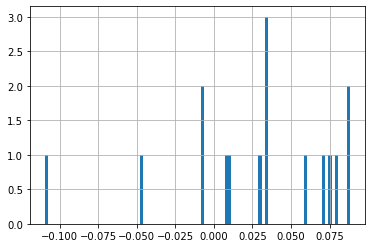

RMSE_900_day_0_mii


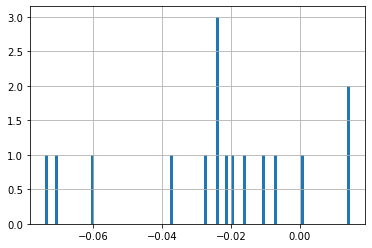

CPU times: user 57 s, sys: 313 ms, total: 57.3 s
Wall time: 12.5 s


In [16]:
%%time

print_cols(JACCARD_COLS)

all_genes_900_df = train_generated_cols(
    gen_combinations(JACCARD_COLS, 1, 1),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

0it [00:00, ?it/s]

Number of columns: 16
-
    "BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_SHORTLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10

2516it [32:41,  1.28it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.131869
1,RMSE_900_day_0_mii,-0.151915
2,RMSE_0b_first_time_900_cumulus_denuded,-0.349887
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.354827
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.681756
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.159640
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.410780
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.192004
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.241718
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.119178


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""BORUTA_GENES_SHORTLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.131869,-0.003505,-0.207238,-0.228645,-0.271051,-0.015964,-0.165838,0.138660,-0.097768,-0.096762,-0.094182,0.086335,-0.043010,0.220489,-0.098720,0.035484,-0.003228,0.032513
"[""BORUTA_GENES_SHORTLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.131869,-0.003505,-0.207238,-0.228645,-0.271051,-0.015964,-0.165838,0.138660,-0.097768,-0.096762,-0.094182,0.086335,-0.043010,0.220489,-0.098720,0.035484,-0.003228,0.032513
"[""BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.131869,-0.003505,-0.207238,-0.228645,-0.271051,-0.015964,-0.165838,0.138660,-0.097768,-0.096762,-0.094182,0.086335,-0.043010,0.220489,-0.098720,0.035484,-0.003228,0.032513
"[""BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.131543,-0.007881,-0.260004,-0.071913,-0.466665,-0.061780,-0.049175,0.108943,-0.067341,-0.064864,-0.122239,0.107670,0.032479,0.195527,-0.080270,0.045189,0.029651,0.027233
"[""BORUTA_GENES_SHORTLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.131543,-0.007881,-0.260004,-0.071913,-0.466665,-0.061780,-0.049175,0.108943,-0.067341,-0.064864,-0.122239,0.107670,0.032479,0.195527,-0.080270,0.045189,0.029651,0.027233


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.067657,-0.151915,-0.164475,-0.088853,-0.148909,-0.099437,-0.059621,0.253645,0.023271,-0.008762,-0.172744,-0.276685,0.152377,-0.329496,-0.151513,-0.158823,-0.063487,-0.020528
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.068243,-0.146856,-0.153581,-0.124756,-0.049496,-0.020491,-0.095430,0.256372,-0.005557,-0.041007,-0.171169,-0.238315,0.208776,-0.352298,-0.136889,-0.107779,-0.055357,-0.065364
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.052684,-0.135768,-0.144339,-0.038238,-0.100410,-0.070507,-0.168573,0.293385,0.012496,0.000787,-0.149735,-0.283577,0.143361,-0.305724,-0.069432,-0.142166,-0.045032,-0.019914
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.078644,-0.134470,-0.236727,0.048798,0.014293,0.047639,-0.143059,0.191285,0.008385,-0.024025,-0.214711,-0.293203,0.220296,0.018971,-0.251575,-0.015445,-0.033587,-0.048926
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg""]",-0.067153,-0.129531,-0.142261,-0.188988,0.063545,0.029263,-0.051686,0.256847,-0.052899,-0.034980,-0.200625,-0.284350,0.138005,-0.013671,-0.339824,0.035780,-0.040788,-0.026039


RMSE_900_cumulus_denuded


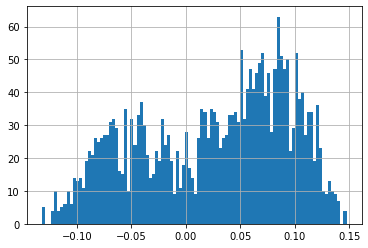

RMSE_900_day_0_mii


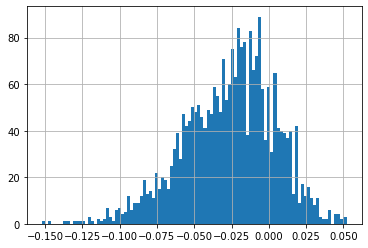

CPU times: user 2h 42min 32s, sys: 46 s, total: 2h 43min 18s
Wall time: 32min 41s


In [17]:
%%time

print_cols(JACCARD_COLS)

all_genes_900_df = train_generated_cols(
    gen_combinations(JACCARD_COLS, 1, 4),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

# JACCARD COLS VS SHORTLIST_CONST_900

0it [00:00, ?it/s]

Number of columns: 16
-
    "BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_SHORTLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "BORUTA_GENES_LONGLIST_WITH_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "SHORTLIST_CONST_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg",
    "ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg",
    "SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10

2517it [37:27,  1.12it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.163975
1,RMSE_900_day_0_mii,-0.118499
2,RMSE_0b_first_time_900_cumulus_denuded,-0.319721
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.561902
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.510069
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.157366
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.389762
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.204049
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.169447
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.106225


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.163975,-0.012907,-0.298046,-0.411980,-0.147660,0.094747,-0.171635,0.106288,-0.033588,-0.021002,-0.040042,0.049957,0.156909,-0.111698,-0.266951,0.076589,0.015733,0.046738
"[""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.159484,-0.021154,-0.260141,-0.426662,-0.225261,0.101354,-0.244098,0.144407,-0.070466,-0.054980,-0.112544,0.159050,-0.175122,-0.092446,-0.155538,0.080122,0.047278,0.037007
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.153104,-0.038110,-0.254728,-0.438785,-0.044216,0.089681,-0.203496,0.100041,-0.029136,-0.045212,-0.042154,-0.060208,0.095016,-0.113460,-0.272554,0.013276,-0.005945,0.037073
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.144876,-0.041922,-0.262872,-0.291583,-0.194381,-0.066518,-0.135702,0.226313,-0.098993,-0.012554,-0.090700,-0.026351,0.129377,-0.100454,-0.246347,0.074818,-0.012180,0.057415
"[""SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.143142,-0.060727,-0.311177,-0.278441,0.072944,0.152901,-0.127804,0.172837,-0.033777,-0.048413,-0.181688,-0.024473,0.224737,0.082793,-0.329906,0.081587,0.030863,0.032485


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.103635,-0.118499,-0.250018,-0.168227,0.238886,0.109011,-0.113871,0.213812,-0.079956,-0.010458,-0.219086,-0.256861,0.108846,0.135681,-0.295334,-0.054478,-0.020894,0.022830
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.047207,-0.115385,-0.084158,-0.217115,-0.039954,0.069949,-0.179361,0.303864,-0.063153,-0.024638,-0.129513,-0.302831,0.106520,-0.099118,-0.227878,-0.080600,-0.052315,0.003048
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.080706,-0.111071,-0.156065,-0.241594,-0.006137,0.042760,-0.175314,0.263168,-0.065638,-0.005458,-0.171249,-0.238959,0.133645,-0.002375,-0.288087,-0.108702,-0.042237,0.060899
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""SHAP_IMPORTANT_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.063940,-0.110711,-0.216243,0.057073,-0.068781,0.081144,0.022358,0.093471,-0.016854,0.029670,-0.229817,-0.199614,0.074145,0.157560,-0.284726,0.031420,-0.035569,-0.005333
"[""BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""BORUTA_GENES_LONGLIST_WITHOUT_AMH_900_JACCARD_FROM_TRAIN_10NN_day_0_mii_avg"", ""ALL_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""LITERATURE_GENES_COLS_900_JACCARD_FROM_TRAIN_10NN_cumulus_denuded_avg"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_

RMSE_900_cumulus_denuded


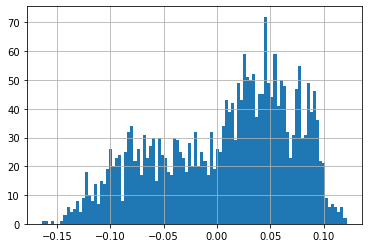

RMSE_900_day_0_mii


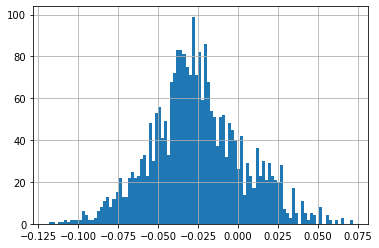

CPU times: user 3h 29min 18s, sys: 1min, total: 3h 30min 19s
Wall time: 37min 27s


In [18]:
%%time

print_cols(JACCARD_COLS)
print_cols(GENE_COL_SETS.SHORTLIST_CONST_900)

all_genes_900_df = train_generated_cols(
    gen_product_generators_2(
        gen_combinations(JACCARD_COLS, 0, 4),
        gen_combinations(
            GENE_COL_SETS.SHORTLIST_CONST_900,
            len(GENE_COL_SETS.SHORTLIST_CONST_900),
            len(GENE_COL_SETS.SHORTLIST_CONST_900)
        ),
    ),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

# ALL_GENES

0it [00:00, ?it/s]

Number of columns: 673
-
    "AMHR2_12_53424132_A_T",
    "AMHR2_12_53424433_A_G",
    "AMHR2_12_53425136_T_C",
    "AMHR2_12_53425326_G_A",
    "AMHR2_12_53425683_T_C",
    "AMHR2_12_53428886_A_G",
    "AMHR2_12_53429208_C_T",
    "AMHR2_12_53429253_A_G",
    "AMHR2_12_53429539_T_C",
    "AMHR2_12_53429764_G_A",
    "AMHR2_12_53430187_-_CTGGGCAATACCCCTACCTCTGATGAG",
    "AMHR2_12_53430359_G_A",
    "AMHR2_12_53430960_G_A",
    "AMHR2_12_53431536_C_T",
    "AMHR2_12_53431541_C_T",
    "AMH_19_2249385_T_C",
    "AMH_19_2249408_G_A",
    "AMH_19_2249584_A_G",
    "AMH_19_2249635_A_G",
    "AMH_19_2249737_C_G",
    "AMH_19_2250176_T_C",
    "AMH_19_2250237_A_G",
    "AMH_19_2250313_T_C",
    "AMH_19_2250352_T_C",
    "AMH_19_2250470_A_G",
    "AMH_19_2250477_G_C",
    "AMH_19_2250523_A_G",
    "AMH_19_2250529_A_G",
    "AMH_19_2251138_G_C",
    "AMH_19_2251179_A_G",
    "AMH_19_2251180_A_G",
    "AMH_19_2251248_G_A",
    "AMH_19_2251328_T_C",
    "AMH_19_2251513_A_T",
    "AMH_19_2251806_

673it [08:19,  1.35it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.027812
1,RMSE_900_day_0_mii,-0.056988
2,RMSE_0b_first_time_900_cumulus_denuded,-0.068349
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.225494
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.185592
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.067891
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.143673
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.206525
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.049695
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.073462


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""BMP15_X_50910775_G_C___5 Prime UTR Variant""]",-0.027812,-0.028489,-0.023554,-0.185782,0.059651,0.068902,-0.035495,-0.108775,0.021426,0.022629,-0.006850,-0.115173,0.036988,-0.059878,-0.167927,0.059562,-0.000364,-0.033148
"[""AR_X_67545785_A_G""]",-0.019615,-0.012784,-0.068349,0.024397,-0.113982,0.064551,-0.015632,0.022216,0.029487,-0.016305,0.011982,-0.062880,-0.038436,-0.105432,0.003356,0.058433,-0.031305,-0.019020
"[""LHCGR_2_48699043_C_G""]",-0.019231,0.007442,-0.015015,-0.113476,-0.056000,0.026256,-0.052533,-0.000012,0.022983,-0.013955,-0.015913,0.114926,-0.030479,0.015549,-0.002993,-0.085697,0.008389,0.027715
"[""OTHER_X_50910111_T_C___2KB Upstream Variant""]",-0.018958,-0.012848,0.019438,-0.138881,-0.073014,0.093565,-0.069908,-0.087408,-0.021964,-0.049002,0.006035,-0.078438,0.034159,-0.036804,-0.162903,0.085702,0.017143,-0.030981
"[""PRLR_5_35230050_A_T""]",-0.016103,-0.013929,-0.017369,-0.085554,0.061570,0.051394,-0.058009,-0.015565,0.008564,-0.013813,0.003310,-0.027308,-0.005679,-0.133407,-0.017150,0.047918,-0.025431,-0.016182


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""SOX9_17_72123104_G_C""]",-0.008942,-0.056988,0.023161,-0.066134,-0.050585,0.054386,-0.018793,-0.206525,0.011668,-0.002771,-0.031150,-0.138233,0.142293,-0.108846,-0.245142,-0.044942,-0.002244,-0.051228
"[""SOX9_17_72125967_A_G""]",0.003193,-0.050187,0.055723,-0.149211,-0.004225,0.125502,-0.023951,-0.204076,0.024819,0.003043,-0.019193,-0.162490,0.011683,-0.095213,-0.186332,-0.005374,-0.008431,-0.040560
"[""ESR2_14_64227364_C_T""]",0.011355,-0.038216,0.025911,0.040742,-0.122919,0.080074,-0.032414,-0.024188,-0.039106,-0.007009,-0.077286,-0.028918,-0.013445,0.030601,-0.034270,-0.028049,-0.009315,-0.028525
"[""BMP15_X_50910775_G_C___5 Prime UTR Variant""]",-0.027812,-0.028489,-0.023554,-0.185782,0.059651,0.068902,-0.035495,-0.108775,0.021426,0.022629,-0.006850,-0.115173,0.036988,-0.059878,-0.167927,0.059562,-0.000364,-0.033148
"[""OTHER_X_140505223_-_AAAAAAA""]",0.004621,-0.028467,-0.006473,0.098905,-0.185592,0.103258,-0.056156,0.021360,-0.046587,-0.028188,-0.100027,0.081385,0.083293,-0.072250,-0.112259,0.116460,0.009017,-0.029338


RMSE_900_cumulus_denuded


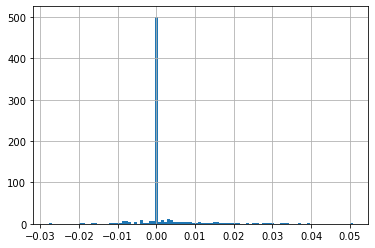

RMSE_900_day_0_mii


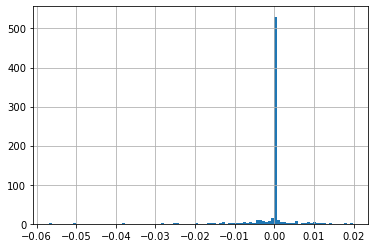

CPU times: user 39min 18s, sys: 12.4 s, total: 39min 30s
Wall time: 8min 20s


In [19]:
%%time

print_cols(GENE_COL_SETS.ALL_GENES_COLS_900)

all_genes_900_df = train_generated_cols(
    gen_combinations(GENE_COL_SETS.ALL_GENES_COLS_900, 1, 1),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

# LITERATURE_GENES

0it [00:00, ?it/s]

Number of columns: 18
-
    "AMH_19_2249478_T_G___Missense Variant",
    "ESR1_6_151842200_C_T___Intron Variant",
    "ESR1_6_151842246_G_A___Intron Variant",
    "ESR2_14_64233098_T_C___Non Coding Transcript Variant 3 Prime downstream",
    "ESR2_14_64257333_T_C___Synonymous Variant",
    "FSHR_2_49154446_T_C___5 Prime UTR Variant",
    "FSHR_2_48963902_T_C___Missense Variant",
    "FSHR_2_48962782_T_C___Missense Variant",
    "LHB_19_49016648_G_A___Missense Variant",
    "LHB_19_49016626_G_A___Missense Variant",
    "LHCGR_2_48755483_G_C___Intron Variant",
    "BMP15_X_50910775_G_C___5 Prime UTR Variant",
    "BMP15_X_50912016_G_A___Intron Variant",
    "BMP15_X_50911091_G_A___Missense Variant",
    "GDF9_5_132862408_T_C___Synonymous Variant",
    "OTHER_12_53423453_G_A___2KB Upstream Variant",
    "OTHER_11_30230805_T_G___2KB Upstream Variant",
    "OTHER_X_50910111_T_C___2KB Upstream Variant",
-
# Number of column combinations: 987
# ETA: 0:14:41


987it [13:16,  1.24it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.030984
1,RMSE_900_day_0_mii,-0.038821
2,RMSE_0b_first_time_900_cumulus_denuded,-0.029481
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.258392
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.200925
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.058469
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.127724
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.169204
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.059594
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.095842


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""ESR2_14_64233098_T_C___Non Coding Transcript Variant 3 Prime downstream"", ""LHB_19_49016648_G_A___Missense Variant"", ""BMP15_X_50910775_G_C___5 Prime UTR Variant""]",-0.030984,-0.007506,-0.006941,-0.215684,0.047596,0.006922,-0.077039,-0.141207,0.037650,0.028410,0.061022,-0.140267,-0.006176,-0.071178,-0.144565,0.052295,-0.032822,-0.009393
"[""BMP15_X_50910775_G_C___5 Prime UTR Variant"", ""OTHER_11_30230805_T_G___2KB Upstream Variant""]",-0.028644,-0.026711,-0.013703,-0.199494,0.007519,0.086843,-0.049332,-0.145563,0.010960,0.024919,-0.008716,-0.039773,0.026659,-0.112383,-0.211357,0.023423,0.008742,-0.026797
"[""BMP15_X_50910775_G_C___5 Prime UTR Variant""]",-0.027812,-0.028489,-0.023554,-0.185782,0.059651,0.068902,-0.035495,-0.108775,0.021426,0.022629,-0.006850,-0.115173,0.036988,-0.059878,-0.167927,0.059562,-0.000364,-0.033148
"[""AMH_19_2249478_T_G___Missense Variant"", ""BMP15_X_50910775_G_C___5 Prime UTR Variant"", ""OTHER_11_30230805_T_G___2KB Upstream Variant""]",-0.027690,-0.028191,-0.011192,-0.194029,-0.002236,0.085834,-0.056088,-0.145406,0.008045,0.026093,-0.015647,-0.041376,0.026659,-0.094984,-0.204293,0.016593,0.010126,-0.025900
"[""FSHR_2_48962782_T_C___Missense Variant"", ""BMP15_X_50910775_G_C___5 Prime UTR Variant"", ""GDF9_5_132862408_T_C___Synonymous Variant""]",-0.027478,-0.016976,-0.027750,-0.217373,-0.119171,0.149941,0.005432,-0.136674,0.026124,0.034601,0.000415,-0.125722,0.055281,0.008076,-0.151114,0.057795,0.010455,-0.007803


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""LHB_19_49016648_G_A___Missense Variant"", ""BMP15_X_50910775_G_C___5 Prime UTR Variant"", ""BMP15_X_50912016_G_A___Intron Variant""]",-0.011781,-0.038821,0.020109,-0.177046,-0.000554,0.051349,-0.025345,-0.135019,0.046590,0.012882,-0.006699,-0.115105,0.034559,-0.161188,-0.199486,0.030407,0.012241,-0.032338
"[""LHB_19_49016648_G_A___Missense Variant"", ""BMP15_X_50910775_G_C___5 Prime UTR Variant"", ""BMP15_X_50911091_G_A___Missense Variant""]",-0.012506,-0.037627,0.002158,-0.150787,-0.072216,0.083926,0.011918,-0.095724,0.016907,0.019202,-0.013259,-0.112681,0.039880,-0.081060,-0.188749,0.000653,0.012067,-0.040459
"[""LHB_19_49016648_G_A___Missense Variant"", ""BMP15_X_50910775_G_C___5 Prime UTR Variant""]",-0.024591,-0.037627,-0.007274,-0.177069,0.000789,0.039515,-0.028715,-0.128502,0.021411,0.022495,-0.013259,-0.112681,0.039880,-0.081060,-0.188749,0.000653,0.012067,-0.040459
"[""FSHR_2_48962782_T_C___Missense Variant"", ""LHB_19_49016648_G_A___Missense Variant"", ""BMP15_X_50910775_G_C___5 Prime UTR Variant""]",-0.024050,-0.036353,-0.003965,-0.220200,-0.061270,0.077815,-0.026962,-0.126648,0.049008,0.014566,-0.010344,-0.097531,0.042378,-0.109654,-0.200883,0.007399,0.008457,-0.034686
"[""AMH_19_2249478_T_G___Missense Variant"", ""LHB_19_49016648_G_A___Missense Variant"", ""BMP15_X_50910775_G_C___5 Prime UTR Variant""]",-0.024591,-0.036083,-0.007274,-0.177069,0.000789,0.039515,-0.028715,-0.128502,0.021411,0.022495,-0.013479,-0.111169,0.039880,-0.064772,-0.182504,0.003010,0.010673,-0.042043


RMSE_900_cumulus_denuded


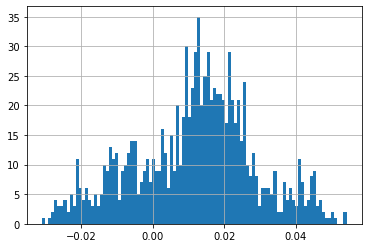

RMSE_900_day_0_mii


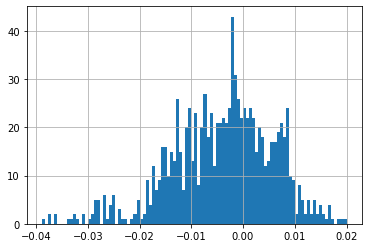

CPU times: user 1h 7min 24s, sys: 20.7 s, total: 1h 7min 45s
Wall time: 13min 17s


In [20]:
%%time

print_cols(GENE_COL_SETS.LITERATURE_GENES_COLS_900)

literature_genes_900_df = train_generated_cols(
    gen_combinations(GENE_COL_SETS.LITERATURE_GENES_COLS_900, 1, 3),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

# SHAP IMPORTANT GENES

0it [00:00, ?it/s]

Number of columns: 23
-
    "SOX9_17_72123104_G_C",
    "LHCGR_2_48755729_A_C",
    "ESR1_6_152061176_T_G",
    "AR_X_67643001_G_A",
    "ESR2_14_64227364_C_T",
    "LHCGR_2_48698552_G_C",
    "ESR1_6_151805689_G_T",
    "LHCGR_2_48729278_T_C",
    "LHCGR_2_48708867_A_G",
    "OTHER_11_30230805_T_G___2KB Upstream Variant",
    "LHCGR_2_48698607_T_C",
    "OTHER_X_50910111_T_C___2KB Upstream Variant",
    "ESR1_6_152061190_G_A",
    "LHCGR_2_48713934_-_A",
    "ESR2_14_64227477_T_C",
    "AR_X_67723521_ACACAC_-",
    "LHCGR_2_48729292_A_T",
    "AR_X_67545785_A_G",
    "SOX9_17_72125967_A_G",
    "OTHER_X_140505223_-_AAAAAAA",
    "AMH_19_2250470_A_G",
    "FSHB_11_30231771_T_A",
    "OTHER_12_49154407_A_G",
-
# Number of column combinations: 276
# ETA: 0:04:06


276it [03:35,  1.28it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.030219
1,RMSE_900_day_0_mii,-0.075800
2,RMSE_0b_first_time_900_cumulus_denuded,-0.073757
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.272459
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.296874
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.093352
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.242712
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.255706
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.076546
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.101221


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""AR_X_67545785_A_G""]",-0.030219,0.002541,-0.052837,-0.078782,-0.065619,0.075619,-0.034458,-0.045065,0.020744,-0.019626,0.045025,-0.095950,-0.026813,-0.059699,-0.045121,0.113366,-0.019932,-0.016950
"[""OTHER_11_30230805_T_G___2KB Upstream Variant"", ""AR_X_67545785_A_G""]",-0.022795,-0.014182,-0.067266,0.016631,-0.111680,0.074911,-0.027686,-0.022856,0.033740,-0.018399,-0.015634,0.065964,-0.038032,-0.188469,-0.055500,0.085675,-0.018439,-0.042804
"[""LHCGR_2_48755729_A_C"", ""AR_X_67545785_A_G""]",-0.020905,-0.007787,-0.063120,0.030728,-0.042882,0.083840,-0.045116,0.007342,-0.004741,-0.023733,-0.030464,0.000028,0.129266,-0.088183,0.007855,0.110029,-0.004319,-0.004109
"[""AR_X_67643001_G_A"", ""OTHER_X_50910111_T_C___2KB Upstream Variant""]",-0.020132,-0.013081,0.013619,-0.140163,-0.055474,0.085652,-0.066730,-0.066696,-0.015314,-0.053518,0.003338,-0.085747,0.045586,-0.033657,-0.148251,0.098136,0.014200,-0.031655
"[""AR_X_67545785_A_G""]",-0.019615,-0.012784,-0.068349,0.024397,-0.113982,0.064551,-0.015632,0.022216,0.029487,-0.016305,0.011982,-0.062880,-0.038436,-0.105432,0.003356,0.058433,-0.031305,-0.019020


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""ESR2_14_64227477_T_C"", ""SOX9_17_72125967_A_G""]",0.014029,-0.075800,0.044683,-0.106995,0.021074,0.222017,-0.052873,-0.188912,0.053812,0.004294,-0.128021,-0.051107,0.033263,-0.031142,-0.163251,-0.064426,-0.009319,-0.053208
"[""SOX9_17_72123104_G_C"", ""ESR2_14_64227477_T_C""]",-0.001980,-0.069053,0.013856,-0.026841,-0.015794,0.143251,-0.068188,-0.194397,0.014718,-0.002612,-0.111318,0.000347,0.121688,0.000664,-0.227470,-0.160647,0.007564,-0.065156
"[""SOX9_17_72123104_G_C"", ""ESR2_14_64227364_C_T""]",0.003416,-0.067294,0.037960,-0.013316,-0.136468,0.082589,-0.023105,-0.150347,-0.015810,-0.012497,-0.080086,-0.199097,0.087553,0.093725,-0.192655,-0.094233,-0.005785,-0.029763
"[""SOX9_17_72123104_G_C"", ""OTHER_X_140505223_-_AAAAAAA""]",-0.009941,-0.066231,-0.011596,-0.025298,-0.157953,0.144653,-0.050182,-0.126747,-0.001971,-0.000099,-0.094921,-0.115427,0.174473,-0.006667,-0.244297,-0.025773,-0.008177,-0.035490
"[""SOX9_17_72125967_A_G"", ""OTHER_X_140505223_-_AAAAAAA""]",-0.002678,-0.065504,0.023183,-0.090169,-0.160527,0.144349,-0.046964,-0.088216,-0.023278,-0.001460,-0.077128,-0.073583,-0.001562,-0.149175,-0.198121,0.032562,-0.033198,-0.053026


RMSE_900_cumulus_denuded


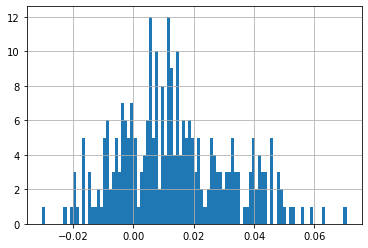

RMSE_900_day_0_mii


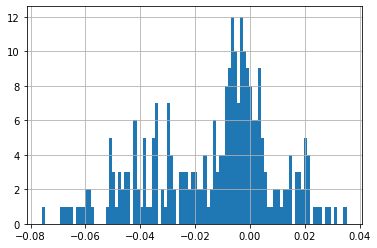

CPU times: user 17min 39s, sys: 5.21 s, total: 17min 44s
Wall time: 3min 36s


In [21]:
%%time

print_cols(GENE_COL_SETS.SHAP_IMPORTANT_GENES_COLS_900)

shap_important_genes_900_df = train_generated_cols(
    gen_combinations(GENE_COL_SETS.SHAP_IMPORTANT_GENES_COLS_900, 1, 2),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

# BORUTA_GENES_LONGLIST_WITH_AMH_900

0it [00:00, ?it/s]

Number of columns: 59
-
    "OTHER_12_49154407_A_G",
    "GDF9_5_132866082_A_T",
    "BMP15_X_50910775_G_C___5 Prime UTR Variant",
    "AMHR2_12_53430960_G_A",
    "GDF9_5_132862507_A_G",
    "SOX9_17_72123104_G_C",
    "ESR1_6_152061176_T_G",
    "LHCGR_2_48755729_A_C",
    "GDF9_5_132865538_C_T",
    "ESR2_14_64227364_C_T",
    "ESR1_6_151805689_G_T",
    "ESR1_6_152061285_G_A",
    "PRLR_5_35072857_-_T",
    "GDF9_5_132865378_T_C",
    "LHCGR_2_48729278_T_C",
    "AMH_19_2250529_A_G",
    "LHCGR_2_48755483_G_C___Intron Variant",
    "SOX9_17_72122794_T_C",
    "LHCGR_2_48698607_T_C",
    "PRLR_5_35230050_A_T",
    "PRLR_5_35072278_G_T",
    "OTHER_19_49015973_G_T",
    "OTHER_X_50910111_T_C___2KB Upstream Variant",
    "PRL_6_22302610_T_G",
    "ESR1_6_151842246_G_A___Intron Variant",
    "ESR1_6_152061190_G_A",
    "LHCGR_2_48713934_-_A",
    "FSHB_11_30233638_T_C",
    "ESR2_14_64227477_T_C",
    "SOX9_17_72126087_-_TTTTTTT",
    "LHCGR_2_48729336_T_C",
    "AR_X_67723521_ACACAC_-

1770it [22:37,  1.30it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.040211
1,RMSE_900_day_0_mii,-0.075800
2,RMSE_0b_first_time_900_cumulus_denuded,-0.080178
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.319425
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.296874
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.109827
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.246112
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.287684
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.081329
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.101221


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""BMP15_X_50910775_G_C___5 Prime UTR Variant"", ""AR_X_67545785_A_G""]",-0.040211,-0.014811,-0.071206,-0.128085,-0.064284,0.084747,-0.032858,-0.104378,0.042199,0.011460,0.023105,-0.128758,-0.034416,-0.063457,-0.086037,0.105166,-0.040211,-0.018200
"[""BMP15_X_50910775_G_C___5 Prime UTR Variant"", ""LHB_19_49017058_C_T""]",-0.037235,-0.012739,-0.011838,-0.253356,0.030809,0.006398,-0.059044,-0.094398,0.022510,0.009554,0.025186,-0.163459,-0.016356,-0.039886,-0.068148,0.087457,0.002344,-0.013185
"[""BMP15_X_50910775_G_C___5 Prime UTR Variant"", ""OTHER_19_49015973_G_T""]",-0.032167,-0.029149,-0.000419,-0.270530,0.130097,0.022840,-0.085420,-0.113108,0.033205,0.016306,-0.001238,-0.115580,0.008521,-0.089841,-0.198648,0.044275,0.008840,-0.017764
"[""BMP15_X_50910775_G_C___5 Prime UTR Variant"", ""PRLR_5_35072857_-_T""]",-0.030309,-0.018064,-0.026105,-0.230827,0.051899,0.112330,-0.038638,-0.119273,0.047343,0.010763,0.001651,-0.096917,0.019686,-0.041652,-0.074584,0.089014,-0.017542,-0.044590
"[""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""AR_X_67545785_A_G""]",-0.030219,0.002541,-0.052837,-0.078782,-0.065619,0.075619,-0.034458,-0.045065,0.020744,-0.019626,0.045025,-0.095950,-0.026813,-0.059699,-0.045121,0.113366,-0.019932,-0.016950


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""ESR2_14_64227477_T_C"", ""SOX9_17_72125967_A_G""]",0.014029,-0.075800,0.044683,-0.106995,0.021074,0.222017,-0.052873,-0.188912,0.053812,0.004294,-0.128021,-0.051107,0.033263,-0.031142,-0.163251,-0.064426,-0.009319,-0.053208
"[""SOX9_17_72123104_G_C"", ""AMH_19_2251513_A_T""]",0.001609,-0.072895,0.037521,-0.086875,-0.023860,0.074357,-0.006068,-0.191153,0.022260,0.016967,-0.076620,-0.145172,0.172290,-0.088567,-0.273823,-0.053883,0.029960,-0.060512
"[""SOX9_17_72123104_G_C"", ""ESR2_14_64227477_T_C""]",-0.001980,-0.069053,0.013856,-0.026841,-0.015794,0.143251,-0.068188,-0.194397,0.014718,-0.002612,-0.111318,0.000347,0.121688,0.000664,-0.227470,-0.160647,0.007564,-0.065156
"[""SOX9_17_72123104_G_C"", ""PRLR_5_35230050_A_T""]",-0.018047,-0.068090,0.009712,-0.116025,-0.013764,0.112899,-0.054360,-0.233422,0.028228,-0.014978,-0.050983,-0.131329,0.146782,-0.129521,-0.267513,-0.065500,-0.020977,-0.040422
"[""SOX9_17_72123104_G_C"", ""AMH_19_2250529_A_G""]",0.002601,-0.068073,0.027880,-0.093992,-0.078693,0.168542,-0.037118,-0.191208,0.008713,0.031494,-0.029029,-0.197238,0.133601,-0.127422,-0.261321,-0.060717,-0.006971,-0.052484


RMSE_900_cumulus_denuded


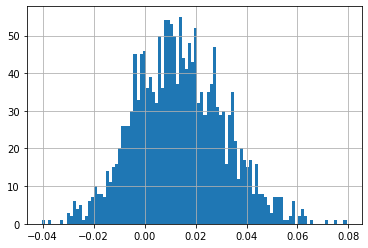

RMSE_900_day_0_mii


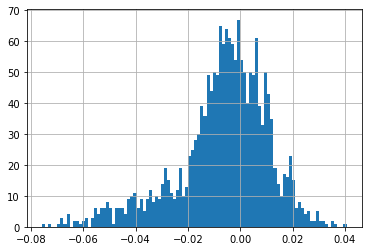

CPU times: user 1h 49min 10s, sys: 33.8 s, total: 1h 49min 44s
Wall time: 22min 38s


In [22]:
%%time

print_cols(GENE_COL_SETS.BORUTA_GENES_LONGLIST_WITH_AMH_900)

shap_important_genes_900_df = train_generated_cols(
    gen_combinations(GENE_COL_SETS.BORUTA_GENES_LONGLIST_WITH_AMH_900, 1, 2),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

# BORUTA_GENES_LONGLIST_WITHOUT_AMH_900

0it [00:00, ?it/s]

Number of columns: 83
-
    "LHCGR_2_48688732_G_A",
    "FSHR_2_48989145_T_C",
    "PRLR_5_35072857_-_T",
    "PRL_6_22292324_A_G",
    "AMH_19_2249584_A_G",
    "LHCGR_2_48708867_A_G",
    "FSHR_2_48962782_T_C___Missense Variant",
    "LHCGR_2_48713934_-_A",
    "ESR2_14_64227477_T_C",
    "PRLR_5_35230396_A_G",
    "SOX9_17_72126087_-_TTTTTTT",
    "PRLR_5_35063190_T_A",
    "ESR1_6_151842149_G_A",
    "OTHER_X_140505223_-_AAAAAAA",
    "ESR1_6_152098960_A_G",
    "ESR1_6_152101035_-_TTTTTTTTTTTTT",
    "FSHR_2_48963902_T_C___Missense Variant",
    "PRLR_5_35230278_C_G",
    "FSHR_2_49154446_T_C___5 Prime UTR Variant",
    "OTHER_12_49154407_A_G",
    "AR_X_67722634_G_A",
    "GDF9_5_132862408_T_C___Synonymous Variant",
    "AMH_19_2251818_C_T",
    "AMH_19_2250529_A_G",
    "LHB_19_49016598_G_T",
    "LHCGR_2_48698607_T_C",
    "ESR1_6_152011897_G_A",
    "OTHER_12_53423453_G_A___2KB Upstream Variant",
    "OTHER_X_50910111_T_C___2KB Upstream Variant",
    "FSHR_2_48962060_G_A",
   

3486it [44:42,  1.30it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.036177
1,RMSE_900_day_0_mii,-0.075800
2,RMSE_0b_first_time_900_cumulus_denuded,-0.094563
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.272459
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.249494
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.107845
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.246112
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.277814
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.069526
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.093360


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""PRL_6_22292324_A_G"", ""AR_X_67545785_A_G""]",-0.036177,0.002183,-0.094563,-0.015560,-0.042361,0.085517,-0.084797,-0.008336,0.018508,-0.001684,0.002372,0.057093,-0.034844,-0.129702,-0.000163,0.086601,-0.039797,0.006137
"[""PRL_6_22292324_A_G"", ""LHCGR_2_48698607_T_C""]",-0.035686,0.007435,0.000737,-0.177195,-0.065081,-0.091417,-0.068776,-0.143519,0.021320,0.017054,0.004903,0.043683,0.018390,0.005845,-0.010679,-0.026288,0.003723,0.011126
"[""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""AR_X_67545785_A_G""]",-0.030219,0.002541,-0.052837,-0.078782,-0.065619,0.075619,-0.034458,-0.045065,0.020744,-0.019626,0.045025,-0.095950,-0.026813,-0.059699,-0.045121,0.113366,-0.019932,-0.016950
"[""AR_X_67545785_A_G"", ""LHB_19_49017058_C_T""]",-0.029662,-0.023764,-0.062726,-0.088157,-0.039555,0.043061,0.016033,0.005702,0.038022,-0.018664,0.005574,-0.131779,-0.051352,-0.139879,-0.006794,0.067278,-0.005127,-0.013025
"[""LHCGR_2_48755729_A_C"", ""LHB_19_49017058_C_T""]",-0.027295,-0.017213,0.005082,-0.135647,-0.068473,-0.007877,-0.087900,-0.008380,-0.060943,-0.019635,-0.026803,-0.097029,0.133927,-0.010714,0.011439,-0.006633,0.021732,0.021048


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""ESR2_14_64227477_T_C"", ""SOX9_17_72125967_A_G""]",0.014029,-0.075800,0.044683,-0.106995,0.021074,0.222017,-0.052873,-0.188912,0.053812,0.004294,-0.128021,-0.051107,0.033263,-0.031142,-0.163251,-0.064426,-0.009319,-0.053208
"[""OTHER_19_49017115_T_A"", ""SOX9_17_72125967_A_G""]",-0.005595,-0.073177,0.034115,-0.169961,-0.014694,0.127339,-0.039250,-0.206084,0.038970,0.015451,-0.043163,-0.233426,0.021716,-0.127905,-0.223200,-0.010303,-0.005433,-0.045614
"[""ESR2_14_64228031_G_T"", ""SOX9_17_72125967_A_G""]",0.027182,-0.066804,0.087862,-0.088368,-0.111570,0.118523,0.048090,-0.149530,0.015672,0.008289,-0.025177,-0.184097,-0.009866,-0.135700,-0.204045,-0.037804,-0.030933,-0.063171
"[""LHCGR_2_48755483_G_C___Intron Variant"", ""SOX9_17_72125967_A_G""]",0.000631,-0.066241,0.038916,-0.107420,0.029204,0.078043,-0.003452,-0.170270,0.023639,0.000962,-0.054872,-0.158913,0.081600,-0.172495,-0.086834,-0.044051,-0.020965,-0.026366
"[""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G""]",-0.002678,-0.065504,0.023183,-0.090169,-0.160527,0.144349,-0.046964,-0.088216,-0.023278,-0.001460,-0.077128,-0.073583,-0.001562,-0.149175,-0.198121,0.032562,-0.033198,-0.053026


RMSE_900_cumulus_denuded


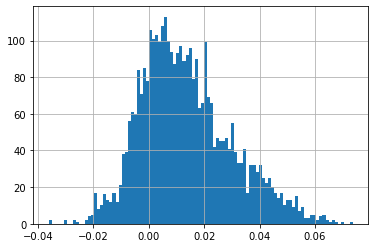

RMSE_900_day_0_mii


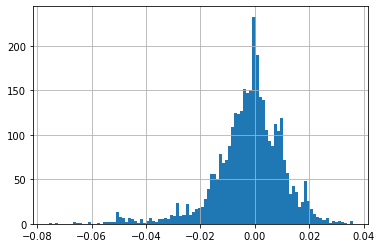

CPU times: user 3h 36min 29s, sys: 1min 7s, total: 3h 37min 36s
Wall time: 44min 43s


In [23]:
%%time

print_cols(GENE_COL_SETS.BORUTA_GENES_LONGLIST_WITHOUT_AMH_900)

shap_important_genes_900_df = train_generated_cols(
    gen_combinations(GENE_COL_SETS.BORUTA_GENES_LONGLIST_WITHOUT_AMH_900, 1, 2),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

# BORUTA_GENES_SHORTLIST_WITH_AMH_900

0it [00:00, ?it/s]

Number of columns: 7
-
    "LHCGR_2_48729278_T_C",
    "AR_X_67723521_ACACAC_-",
    "GDF9_5_132866205_C_T",
    "SOX9_17_72125967_A_G",
    "ESR2_14_64227364_C_T",
    "OTHER_X_50910111_T_C___2KB Upstream Variant",
    "OTHER_X_140505223_-_AAAAAAA",
-
# Number of column combinations: 127
# ETA: 0:01:53


127it [01:46,  1.19it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.028961
1,RMSE_900_day_0_mii,-0.094918
2,RMSE_0b_first_time_900_cumulus_denuded,-0.030371
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.278090
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.245010
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.120132
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.239818
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.255948
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.074192
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.105690


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""LHCGR_2_48729278_T_C"", ""GDF9_5_132866205_C_T"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant""]",-0.028961,0.024122,-0.030371,-0.113839,-0.113755,0.059144,-0.049431,-0.027894,-0.036902,0.005215,0.008851,0.117951,-0.028478,0.129746,-0.120310,-0.025497,0.001011,0.019040
"[""LHCGR_2_48729278_T_C"", ""GDF9_5_132866205_C_T"", ""SOX9_17_72125967_A_G"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant""]",-0.026003,-0.060155,-0.007556,-0.174918,-0.102554,0.138746,-0.064359,-0.146300,-0.007925,0.007076,-0.073503,-0.203925,-0.047304,0.110575,-0.230919,0.036220,-0.015351,-0.048486
"[""LHCGR_2_48729278_T_C"", ""GDF9_5_132866205_C_T"", ""SOX9_17_72125967_A_G"", ""OTHER_X_50910111_T_C___2KB Upstream Variant""]",-0.023974,-0.050285,0.029545,-0.174886,-0.128868,0.133398,-0.148937,-0.198719,-0.000009,-0.037655,-0.014230,-0.238706,-0.024042,-0.004777,-0.222428,0.039408,-0.007604,-0.048140
"[""LHCGR_2_48729278_T_C"", ""GDF9_5_132866205_C_T"", ""SOX9_17_72125967_A_G""]",-0.021312,-0.031783,0.011453,-0.220296,0.003853,0.144848,-0.149889,-0.202402,0.028992,0.035968,-0.018665,-0.199184,-0.069266,0.058786,-0.142416,0.088295,-0.024375,-0.009460
"[""LHCGR_2_48729278_T_C"", ""GDF9_5_132866205_C_T"", ""SOX9_17_72125967_A_G"", ""ESR2_14_64227364_C_T""]",-0.019270,-0.058397,0.006809,-0.139104,-0.113010,0.041369,-0.056633,-0.175568,-0.011139,0.058731,-0.065191,-0.162287,-0.052805,0.104215,-0.207690,-0.039305,-0.031985,-0.044146


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""SOX9_17_72125967_A_G"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA""]",-0.000114,-0.094918,0.042104,-0.167232,-0.220068,0.172174,0.000588,-0.098495,-0.018008,-0.000103,-0.085755,-0.214805,-0.022339,-0.123074,-0.317435,-0.041296,-0.003372,-0.059222
"[""SOX9_17_72125967_A_G"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA""]",0.001032,-0.092863,0.032723,-0.122916,-0.245010,0.216961,-0.036267,-0.129044,-0.020898,0.007029,-0.116273,-0.162573,-0.049292,-0.009447,-0.304517,-0.062875,0.005819,-0.074558
"[""AR_X_67723521_ACACAC_-"", ""SOX9_17_72125967_A_G"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA""]",0.026209,-0.090582,0.156284,-0.240611,-0.005055,0.128928,-0.073361,-0.074106,-0.013273,-0.086418,-0.066144,-0.272091,0.097630,-0.095491,-0.312041,-0.057439,0.016659,-0.061342
"[""AR_X_67723521_ACACAC_-"", ""SOX9_17_72125967_A_G"", ""ESR2_14_64227364_C_T"", ""OTHER_X_140505223_-_AAAAAAA""]",0.029819,-0.085323,0.143648,-0.120961,-0.097133,0.049875,-0.079915,-0.082423,-0.039023,-0.032779,-0.112973,-0.122993,0.003446,-0.047911,-0.278723,-0.026967,-0.014329,-0.064080
"[""AR_X_67723521_ACACAC_-"", ""SOX9_17_72125967_A_G"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA""]",0.011509,-0.084241,0.106853,-0.182381,-0.099172,0.120182,-0.040870,-0.165924,-0.009533,-0.039926,-0.082509,-0.215610,-0.003106,0.018290,-0.285809,-0.057274,-0.014364,-0.068287


RMSE_900_cumulus_denuded


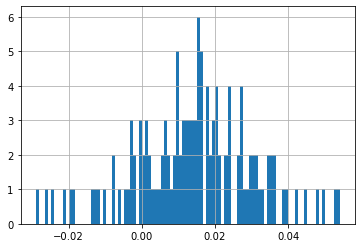

RMSE_900_day_0_mii


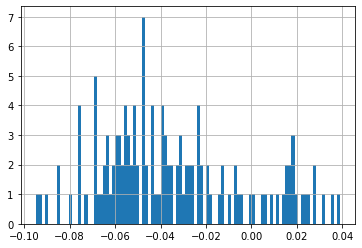

CPU times: user 9min 22s, sys: 3.04 s, total: 9min 25s
Wall time: 1min 46s


In [24]:
%%time

print_cols(GENE_COL_SETS.BORUTA_GENES_SHORTLIST_WITH_AMH_900)

shap_important_genes_900_df = train_generated_cols(
    gen_combinations(
        GENE_COL_SETS.BORUTA_GENES_SHORTLIST_WITH_AMH_900,
        1,
        len(GENE_COL_SETS.BORUTA_GENES_SHORTLIST_WITH_AMH_900)),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

# BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900

0it [00:00, ?it/s]

Number of columns: 21
-
    "AMHR2_12_53430960_G_A",
    "FSHR_2_48962487_T_A",
    "PRL_6_22292324_A_G",
    "AMH_19_2250529_A_G",
    "OTHER_19_49017115_T_A",
    "ESR1_6_152061190_G_A",
    "ESR2_14_64227477_T_C",
    "PRLR_5_35230396_A_G",
    "LHCGR_2_48729336_T_C",
    "AR_X_67723521_ACACAC_-",
    "ESR2_14_64228031_G_T",
    "GDF9_5_132866205_C_T",
    "LHCGR_2_48687476_G_C",
    "SOX9_17_72125967_A_G",
    "OTHER_X_140505223_-_AAAAAAA",
    "ESR1_6_152061247_A_G",
    "ESR2_14_64227440_C_T",
    "ESR1_6_152101035_-_TTTTTTTTTTTTT",
    "PRL_6_22292472_G_A",
    "PRLR_5_35064922_G_C",
    "OTHER_12_49154407_A_G",
-
# Number of column combinations: 7546
# ETA: 1:52:17


7546it [1:40:53,  1.25it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.020422
1,RMSE_900_day_0_mii,-0.101981
2,RMSE_0b_first_time_900_cumulus_denuded,-0.032630
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.279810
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.203195
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.140617
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.224943
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.276172
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.081161
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.089158


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""PRL_6_22292324_A_G"", ""ESR1_6_152061190_G_A"", ""PRLR_5_35230396_A_G"", ""OTHER_X_140505223_-_AAAAAAA""]",-0.020422,-0.019927,-0.026104,-0.019660,-0.132386,0.089779,-0.132529,-0.021998,-0.049009,-0.005304,-0.090242,0.108056,0.037390,-0.052151,-0.128953,0.096889,0.001886,-0.000032
"[""PRL_6_22292324_A_G"", ""LHCGR_2_48729336_T_C"", ""PRLR_5_35064922_G_C""]",-0.019788,0.014012,-0.026260,-0.031551,0.033685,-0.000223,-0.067627,-0.030157,-0.017626,0.003592,0.008805,0.040889,-0.015867,0.013385,-0.001662,0.034205,-0.016134,0.027125
"[""PRL_6_22292324_A_G"", ""PRLR_5_35230396_A_G"", ""OTHER_X_140505223_-_AAAAAAA"", ""PRLR_5_35064922_G_C""]",-0.019154,-0.020277,-0.023224,0.017729,-0.097569,0.086362,-0.163340,0.012116,-0.065031,-0.036076,-0.095092,0.081346,0.075120,-0.042471,-0.112156,0.146359,-0.004418,-0.004874
"[""PRL_6_22292324_A_G"", ""PRLR_5_35230396_A_G"", ""OTHER_X_140505223_-_AAAAAAA""]",-0.017576,-0.015397,-0.019593,0.017863,-0.089935,0.095401,-0.158371,-0.004747,-0.062357,-0.035794,-0.083325,0.101422,0.076883,-0.062258,-0.103706,0.138777,0.002261,-0.013086
"[""PRL_6_22292324_A_G"", ""PRLR_5_35230396_A_G"", ""LHCGR_2_48729336_T_C"", ""PRLR_5_35064922_G_C""]",-0.017218,0.014012,-0.019798,-0.027520,0.093454,-0.003101,-0.064044,-0.048851,-0.023033,0.007407,0.008805,0.040889,-0.015867,0.013385,-0.001662,0.034205,-0.016134,0.027125


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""OTHER_19_49017115_T_A"", ""ESR2_14_64227477_T_C"", ""SOX9_17_72125967_A_G"", ""OTHER_X_140505223_-_AAAAAAA""]",0.003900,-0.101981,0.037807,-0.130055,-0.128922,0.208544,-0.110191,-0.079435,-0.024759,0.012840,-0.186049,-0.063610,0.080418,-0.034895,-0.272666,-0.030945,-0.028828,-0.051298
"[""OTHER_19_49017115_T_A"", ""ESR2_14_64227477_T_C"", ""ESR2_14_64228031_G_T"", ""SOX9_17_72125967_A_G""]",0.018245,-0.101003,0.090706,-0.139836,-0.050063,0.140084,-0.047398,-0.157576,-0.006805,0.006644,-0.131068,-0.184731,0.027728,-0.054128,-0.191578,-0.088192,-0.015332,-0.057992
"[""OTHER_19_49017115_T_A"", ""ESR2_14_64227477_T_C"", ""SOX9_17_72125967_A_G"", ""PRL_6_22292472_G_A""]",0.019969,-0.100875,0.084134,-0.118067,0.068361,0.141262,-0.082388,-0.182386,0.037652,-0.001498,-0.156233,-0.156350,0.060378,-0.009204,-0.227550,-0.060617,-0.013059,-0.052346
"[""OTHER_19_49017115_T_A"", ""ESR2_14_64227477_T_C"", ""PRLR_5_35230396_A_G"", ""SOX9_17_72125967_A_G""]",-0.000355,-0.100766,0.054016,-0.209516,0.106337,0.195296,-0.115130,-0.172774,0.026505,-0.011753,-0.155505,-0.157751,0.072047,-0.012307,-0.223989,-0.059115,-0.017577,-0.050305
"[""OTHER_19_49017115_T_A"", ""ESR2_14_64227477_T_C"", ""SOX9_17_72125967_A_G""]",0.003917,-0.100221,0.062731,-0.208241,0.091208,0.194893,-0.118509,-0.185189,0.046433,-0.012368,-0.157282,-0.149966,0.064541,-0.011585,-0.225074,-0.057322,-0.014328,-0.051826


RMSE_900_cumulus_denuded


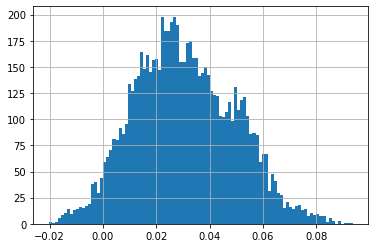

RMSE_900_day_0_mii


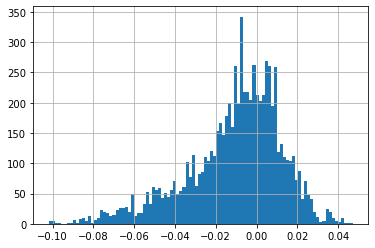

CPU times: user 8h 30min 13s, sys: 2min 33s, total: 8h 32min 46s
Wall time: 1h 40min 54s


In [25]:
%%time

print_cols(GENE_COL_SETS.BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900)

shap_important_genes_900_df = train_generated_cols(
    gen_combinations(
        GENE_COL_SETS.BORUTA_GENES_SHORTLIST_WITHOUT_AMH_900, 1, 4),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

# SHORTLIST_CONST_900

0it [00:00, ?it/s]

Number of columns: 7
-
    "ESR2_14_64227364_C_T",
    "OTHER_X_50910111_T_C___2KB Upstream Variant",
    "OTHER_X_140505223_-_AAAAAAA",
    "SOX9_17_72125967_A_G",
    "AR_X_67723521_ACACAC_-",
    "GDF9_5_132866205_C_T",
    "LHCGR_2_48729278_T_C",
-
# Number of column combinations: 127
# ETA: 0:01:53


127it [01:46,  1.19it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.028961
1,RMSE_900_day_0_mii,-0.094918
2,RMSE_0b_first_time_900_cumulus_denuded,-0.030371
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.278090
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.245010
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.120132
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.239818
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.255948
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.074192
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.105690


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.028961,0.024122,-0.030371,-0.113839,-0.113755,0.059144,-0.049431,-0.027894,-0.036902,0.005215,0.008851,0.117951,-0.028478,0.129746,-0.120310,-0.025497,0.001011,0.019040
"[""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""SOX9_17_72125967_A_G"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.026003,-0.060155,-0.007556,-0.174918,-0.102554,0.138746,-0.064359,-0.146300,-0.007925,0.007076,-0.073503,-0.203925,-0.047304,0.110575,-0.230919,0.036220,-0.015351,-0.048486
"[""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""SOX9_17_72125967_A_G"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.023974,-0.050285,0.029545,-0.174886,-0.128868,0.133398,-0.148937,-0.198719,-0.000009,-0.037655,-0.014230,-0.238706,-0.024042,-0.004777,-0.222428,0.039408,-0.007604,-0.048140
"[""SOX9_17_72125967_A_G"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.021312,-0.031783,0.011453,-0.220296,0.003853,0.144848,-0.149889,-0.202402,0.028992,0.035968,-0.018665,-0.199184,-0.069266,0.058786,-0.142416,0.088295,-0.024375,-0.009460
"[""ESR2_14_64227364_C_T"", ""SOX9_17_72125967_A_G"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.019270,-0.058397,0.006809,-0.139104,-0.113010,0.041369,-0.056633,-0.175568,-0.011139,0.058731,-0.065191,-0.162287,-0.052805,0.104215,-0.207690,-0.039305,-0.031985,-0.044146


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G""]",-0.000114,-0.094918,0.042104,-0.167232,-0.220068,0.172174,0.000588,-0.098495,-0.018008,-0.000103,-0.085755,-0.214805,-0.022339,-0.123074,-0.317435,-0.041296,-0.003372,-0.059222
"[""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G""]",0.001032,-0.092863,0.032723,-0.122916,-0.245010,0.216961,-0.036267,-0.129044,-0.020898,0.007029,-0.116273,-0.162573,-0.049292,-0.009447,-0.304517,-0.062875,0.005819,-0.074558
"[""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-""]",0.026209,-0.090582,0.156284,-0.240611,-0.005055,0.128928,-0.073361,-0.074106,-0.013273,-0.086418,-0.066144,-0.272091,0.097630,-0.095491,-0.312041,-0.057439,0.016659,-0.061342
"[""ESR2_14_64227364_C_T"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-""]",0.029819,-0.085323,0.143648,-0.120961,-0.097133,0.049875,-0.079915,-0.082423,-0.039023,-0.032779,-0.112973,-0.122993,0.003446,-0.047911,-0.278723,-0.026967,-0.014329,-0.064080
"[""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-""]",0.011509,-0.084241,0.106853,-0.182381,-0.099172,0.120182,-0.040870,-0.165924,-0.009533,-0.039926,-0.082509,-0.215610,-0.003106,0.018290,-0.285809,-0.057274,-0.014364,-0.068287


RMSE_900_cumulus_denuded


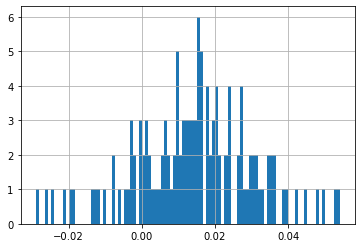

RMSE_900_day_0_mii


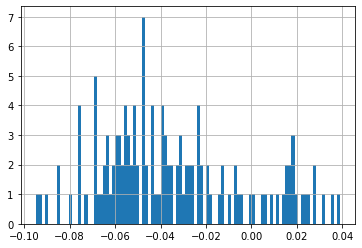

CPU times: user 9min 21s, sys: 2.93 s, total: 9min 24s
Wall time: 1min 47s


In [26]:
%%time

print_cols(GENE_COL_SETS.SHORTLIST_CONST_900)

shap_important_genes_900_df = train_generated_cols(
    gen_combinations(
        GENE_COL_SETS.SHORTLIST_CONST_900,
        1,
        len(GENE_COL_SETS.SHORTLIST_CONST_900)),
    LGB_PARAMS_BASE,
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    5, ETA_900)

# HORMONES VS SHORTLIST_CONST_900

0it [00:00, ?it/s]

Number of columns: 8
-
    "test_inhibina_b_r",
    "test_tsh_r",
    "test_e2_r",
    "test_fsh_r",
    "test_lh_r",
    "test_testosterone_r",
    "test_shbg_r",
    "test_dhea_s_r",
-
Number of columns: 7
-
    "ESR2_14_64227364_C_T",
    "OTHER_X_50910111_T_C___2KB Upstream Variant",
    "OTHER_X_140505223_-_AAAAAAA",
    "SOX9_17_72125967_A_G",
    "AR_X_67723521_ACACAC_-",
    "GDF9_5_132866205_C_T",
    "LHCGR_2_48729278_T_C",
-
# Number of column combinations: 952
# ETA: 0:14:10


952it [13:16,  1.20it/s]

model: l2
sorted_by: RMSE


,index,0
0,RMSE_900_cumulus_denuded,-0.033547
1,RMSE_900_day_0_mii,-0.097256
2,RMSE_0b_first_time_900_cumulus_denuded,-0.030833
3,RMSE_0c_prev10ormore_900_cumulus_denuded,-0.282459
4,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.378445
5,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.208642
6,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,-0.377055
7,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,-0.337354
8,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,-0.133454
9,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,-0.163156


,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""test_e2_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""AR_X_67723521_ACACAC_-"", ""LHCGR_2_48729278_T_C""]",-0.033547,-0.014809,-0.019151,-0.165982,-0.003758,-0.052885,-0.121364,0.020861,0.040937,-0.030268,0.007890,-0.082228,0.089655,0.014610,-0.089740,-0.081952,0.029702,-0.012434
"[""test_e2_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""AR_X_67723521_ACACAC_-"", ""LHCGR_2_48729278_T_C""]",-0.028605,-0.046566,0.003489,-0.119885,-0.016098,-0.034363,-0.235959,-0.004151,0.018997,-0.043160,-0.063833,-0.116239,0.074403,0.066481,-0.236310,-0.033366,0.009113,-0.014000
"[""test_e2_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-"", ""LHCGR_2_48729278_T_C""]",-0.025670,-0.034149,0.009678,-0.228172,0.023568,-0.012869,-0.109095,-0.127686,0.108280,-0.008612,0.017290,-0.229210,0.011646,0.038144,-0.165913,-0.048943,0.010627,-0.029433
"[""test_testosterone_r"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""SOX9_17_72125967_A_G"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.025183,-0.010989,-0.030833,-0.148085,0.007216,0.136878,-0.109864,-0.163923,0.031633,0.045652,-0.039716,-0.060689,-0.009797,0.081619,-0.156106,0.176735,-0.003364,-0.017567
"[""test_e2_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""LHCGR_2_48729278_T_C""]",-0.023910,-0.019215,-0.012773,-0.075457,0.007915,-0.041461,-0.106637,-0.055085,0.020282,-0.007545,0.017905,-0.160688,0.118878,0.016046,-0.068378,-0.081408,0.018359,0.001205
"[""test_e2_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""LHCGR_2_48729278_T_C""]",-0.022182,-0.072920,-0.002863,-0.149876,-0.028999,0.023285,-0.126690,-0.091295,0.061409,-0.000187,-0.056481,-0.274787,-0.002624,-0.017188,-0.213510,-0.007976,-0.013719,-0.025610
"[""test_fsh_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.020280,-0.045696,-0.011383,0.096315,-0.020609,-0.061371,0.007815,-0.164039,-0.073547,-0.028684,-0.087590,0.038678,0.324685,0.033733,-0.242112,-0.001910,-0.016558,-0.121917
"[""test_fsh_r"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.020186,-0.038388,-0.005598,0.076413,0.037903,-0.046845,-0.037388,-0.177701,-0.059068,-0.031997,-0.071389,0.035972,0.381411,0.037314,-0.326732,-0.033102,-0.014074,-0.066442
"[""test_testosterone_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""SOX9_17_72125967_A_G"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.019745,-0.018391,-0.024642,-0.120932,-0.042771,0.150440,-0.097076,-0.133741,-0.007173,0.052469,-0.055136,-0.166217,-0.103397,0.173830,-0.143814,0.253590,0.004730,-0.035453
"[""test_e2_r"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""GDF9_5_132866205_C_T"", ""LHCGR_2_48729278_T_C""]",-0.019423,-0

,RMSE_900_cumulus_denuded,RMSE_900_day_0_mii,RMSE_0b_first_time_900_cumulus_denuded,RMSE_0c_prev10ormore_900_cumulus_denuded,RMSE_1a_young35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_1b_young35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_2a_old35_highAMH1.2_prev0to3_900_cumulus_denuded,RMSE_2b_old35_highAMH1.2_prev4to9_900_cumulus_denuded,RMSE_3_young35_lowAMH1.2_900_cumulus_denuded,RMSE_4_old35_lowAMH1.2_900_cumulus_denuded,RMSE_0b_first_time_900_day_0_mii,RMSE_0c_prev10ormore_900_day_0_mii,RMSE_1a_young35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_1b_young35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_2a_old35_highAMH1.2_prev0to3_900_day_0_mii,RMSE_2b_old35_highAMH1.2_prev4to9_900_day_0_mii,RMSE_3_young35_lowAMH1.2_900_day_0_mii,RMSE_4_old35_lowAMH1.2_900_day_0_mii
"[""test_inhibina_b_r"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G""]",0.056975,-0.097256,0.127213,0.081348,0.005427,0.104110,-0.136510,-0.252951,0.054398,0.052395,-0.121428,-0.068534,0.104656,-0.251684,-0.187892,-0.188054,-0.001852,-0.012930
"[""test_fsh_r"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G""]",0.055343,-0.096817,0.108068,0.155458,-0.145970,0.063911,0.145144,-0.137021,-0.047442,-0.003384,-0.077897,-0.181486,0.392737,-0.127919,-0.385413,-0.094573,-0.019647,-0.119161
"[""test_inhibina_b_r"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-""]",0.086970,-0.096135,0.193550,0.071049,0.047272,0.016618,-0.138891,-0.070894,0.076080,0.022249,-0.137779,-0.045439,0.202836,-0.227500,-0.200965,-0.173680,-0.014647,-0.002193
"[""test_fsh_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""LHCGR_2_48729278_T_C""]",0.016344,-0.095957,0.087404,0.180732,0.010273,-0.040174,-0.153488,-0.142727,-0.097310,-0.085150,-0.143024,-0.063035,0.324452,0.072297,-0.272978,-0.127978,-0.077173,-0.142226
"[""test_fsh_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G""]",0.059151,-0.095392,0.149157,0.125759,-0.077702,-0.034918,0.111282,-0.123697,-0.063492,-0.010929,-0.114893,-0.088825,0.413817,-0.057187,-0.239598,-0.102264,-0.086823,-0.142068
"[""test_inhibina_b_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""GDF9_5_132866205_C_T""]",0.085382,-0.091696,0.154912,0.081427,0.032095,0.133149,-0.060586,-0.121375,0.079612,0.054848,-0.120222,-0.080652,0.209301,-0.259149,-0.225512,-0.120861,-0.002518,0.003961
"[""test_fsh_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G""]",0.047239,-0.091264,0.118212,0.106640,-0.100011,0.052916,0.063558,-0.129102,-0.053111,-0.026733,-0.088941,-0.119067,0.329443,-0.042986,-0.344227,-0.121249,-0.036290,-0.139695
"[""test_fsh_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_50910111_T_C___2KB Upstream Variant"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""LHCGR_2_48729278_T_C""]",0.008719,-0.090246,0.065789,0.079135,-0.057554,-0.037433,-0.033814,-0.220903,-0.052165,-0.010061,-0.108198,-0.108343,0.326833,0.047423,-0.319297,-0.145581,-0.027888,-0.143528
"[""test_inhibina_b_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G""]",0.080348,-0.089832,0.151131,0.106153,0.006838,0.099768,-0.107370,-0.097817,0.064521,0.043128,-0.130535,-0.007720,0.132758,-0.226044,-0.231251,-0.166678,0.007444,-0.016999
"[""test_fsh_r"", ""ESR2_14_64227364_C_T"", ""OTHER_X_140505223_-_AAAAAAA"", ""SOX9_17_72125967_A_G"", ""AR_X_67723521_ACACAC_-""]",0.075233,-0.087362,0.184739,0.172849,-0.047921,-0.062656,0.086622,-0.151396,-0.072482,0.003252,-0.110337,-0.051491,0.432045,-0.076680,-0.259297,-0.079522,-0.059839,-0.149741


RMSE_900_cumulus_denuded


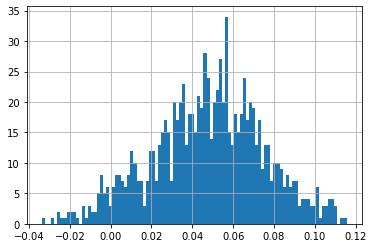

RMSE_900_day_0_mii


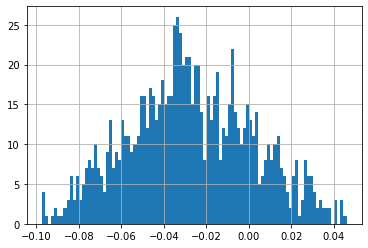

CPU times: user 1h 9min 45s, sys: 21.3 s, total: 1h 10min 6s
Wall time: 13min 17s


In [27]:
%%time

print_cols(COL_SETS.HORMONE_COLS_900)
print_cols(GENE_COL_SETS.SHORTLIST_CONST_900)

hormoes_vs_boruta_genes_df = train_generated_cols(
    gen_product_generators_2(
        gen_combinations(COL_SETS.HORMONE_COLS_900, 1, 1),
        gen_combinations(GENE_COL_SETS.SHORTLIST_CONST_900, 1, 5),
    ),
    LGB_PARAMS_BASE, 
    DATA_SERIES_900,
    BASE_COLS_2, SELECTED_BASE_RESULT,
    MODEL_SUFFIX, SORT_METRIC,
    25, ETA_900)


In [28]:
print(f'DONE: {format(datetime.now() - start_time)}')

DONE: 5:51:43.814109
